<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/t_test_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv")
sample = df.sample(n=50,random_state=42)
female_height = sample.loc[ sample['Gender']=='Female',"Height"]
male_height = sample.loc[ sample['Gender']=='Male',"Height"]
## Getting means for gender height
print(f"For Males (n={len(male_height)}): Mean={np.mean(male_height):.2f}")
print(f"For Females (n={len(female_height)}): Mean={np.mean(female_height):.2f}")

For Males (n=27): Mean=68.90
For Females (n=23): Mean=64.13


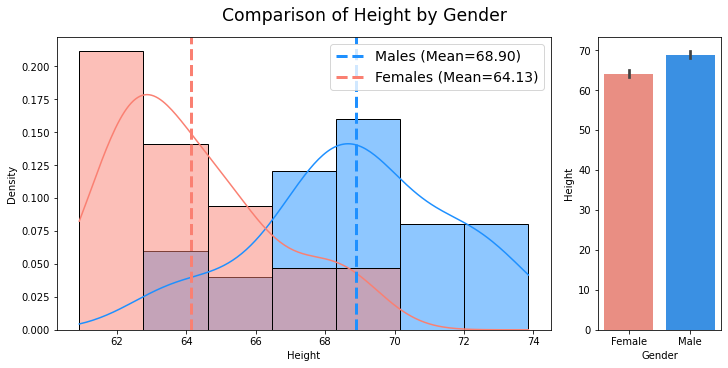

In [ ]:
gender_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2,
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='Height',fill=True,hue='Gender',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(male_height), ls='--',lw=3,
           label=f"Males (Mean={np.mean(male_height):.2f})",color=gender_palette['Male'])

ax.axvline(np.mean(female_height), ls='--', lw=3,
           label=f"Females (Mean={np.mean(female_height):.2f})",color=gender_palette['Female'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='Gender',y='Height',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Height by Gender',fontsize='xx-large');